# **Installing Libraries**

In [ ]:
%%capture
!pip install tensorflow_addons
!pip install --upgrade gupload

In [ ]:
%%capture
!pip3 install transformers
!pip3 install datasets
!pip3 install sentencepiece

In [ ]:
%%capture
!pip install hazm
!pip install https://github.com/roshan-research/hazm/archive/master.zip --upgrade

In [ ]:
%%capture
!pip install git+https://github.com/huggingface/accelerate

In [ ]:
%%capture
!pip install transformers[torch]

In [ ]:
import keras
import re
import string
import nltk
import numpy as np
import pandas as pd
nltk.download('punkt')
#from collections import Counter
#from nltk.tokenize import word_tokenize
#from nltk.stem import PorterStemmer, SnowballStemmer
#from nltk import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import requests
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pydrive.auth import GoogleAuth
from google.colab import auth
from google.colab import drive
from itertools import compress
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, AutoConfig, AutoTokenizer, AutoModel

In [ ]:
import hazm

In [ ]:
import accelerate

In [ ]:
print(accelerate.__version__)

0.21.0.dev0


In [ ]:
import torch

In [ ]:
print(torch.__version__)

2.0.1+cu118


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Projects_Data/Financial_Text/'

In [ ]:
%cd "drive/MyDrive/Projects_Data/Financial_Text/"

/content/drive/MyDrive/Projects_Data/Financial_Text


# **Loading Data**

#### Load

In [ ]:
!ls

 All_Text_dataset.pkl
'All_Text_Normalized_and_Tokenized_and_stemmed (1).pkl'
 All_Text_Normalized_and_Tokenized_and_stemmed.pkl
 All_Text_Normalized.pkl
 betasahm1.xlsx
 BourseUniversity_and_akhbar_majame.xlsx
 ds_normalized_and_stemmed.pkl
 EghtesadOnline.xlsx
 glove.6B.100d.txt
 glove.6B.200d.txt
 glove.6B.300d.txt
 glove.6B.50d.txt
 glove.6B.zip
 labse_without_pretrain
'lm_datasets (1).pkl'
 lm_datasets.pkl
 mbert_without_pretrain
'News Articles.zip'
 StopWords_1.txt
 Tansim.xlsx
 tejarat_news.xlsx
 Telegram_betasahm1.xlsx
'tokenized_datasets_with_XLMRoberta_2 (1).pkl'
 tokenized_datasets_with_XLMRoberta_2.pkl
 tokenized_datasets_with_XLMRoberta.pkl


In [ ]:
EghtesadOnline = pd.read_excel( 'EghtesadOnline.xlsx' )
EghtesadOnline.head(1)

,Unnamed: 0,Datetime,Title,Description,Link,Label,Multi Subject,Non Relevant,Source
0,0,2023-05-05T17:35:53Z,مجامع هفته آتی/ سیمان دورود به مجمع سالیانه می...,نماد سدور با نام سیمان دورود یکی از شرکت های پ...,https://www.eghtesadonline.com/بخش-%D8%A7%D8%A...,0,0,0,EghtesadOnline


In [ ]:
Tansim = pd.read_excel( 'Tansim.xlsx' )
Tansim.head(1)

,Unnamed: 0,Datetime,Title,Description,Link,Label,MS,NR,Hard,Source
0,0,1 ساعت پیش,مدیرعامل بورس کالای ایران: به دنبال راه اندازی...,مدیرعامل بورس کالای ایران گفت: به منظور تامین ...,https://www.tasnimnews.com/fa/news/1402/02/16/...,0,0,0,0,Tansim


In [ ]:
tejarat_news = pd.read_excel( 'tejarat_news.xlsx' )
tejarat_news.head(1)

,Unnamed: 0,Datetime,Title,Description,Link,"label (1,0,-1)",MultiSubject,Not Relevant,hard,Source
0,0,5/4/2023 20:35,عرضه خودرو در بورس کالا به خودروسازان واگذار شد,\nدرحالی‌که چالش‌های فراوانی بر سر عرضه خودرو ...,https://tejaratnews.com/%d8%b9%d8%b1%d8%b6%d9%...,1,0,0,0,TejaratNews


In [ ]:
Telegram_betasahm1 = pd.read_excel( 'Telegram_betasahm1.xlsx' )
Telegram_betasahm1.head(1)

,Unnamed: 0,Link,Time,Source,Text,Label,MS,Hard
0,4557,https://telegram.me/betasahm1/97297,۱۰:۲۷:۴۲ ۱۴۰۰/۰۴/۳۱,Telegram_betasahm1,بررسی_گزارش_کدال #چدن\n✅ تولیدی چدن سازان ( با...,1,0,0


#### Exploring

In [ ]:
len(Telegram_betasahm1) + len(tejarat_news) + len(Tansim) + len(EghtesadOnline)

4962

In [ ]:
print( sum(EghtesadOnline['Multi Subject']) )
print( sum(Telegram_betasahm1['MS']) )
print( sum(tejarat_news['MultiSubject']) )
print( sum(Tansim['MS']) )

2
15
54
0


In [ ]:
print( sum(Telegram_betasahm1['Hard']) )

127


In [ ]:
tejarat_news['hard'][38] = 1
c = 0
for i in range(len(tejarat_news)):
    c += int( tejarat_news['hard'][i] )
c

169

In [ ]:
print('tejarat_news')
for i in range(len(tejarat_news)):
    try:
        int( tejarat_news['label (1,0,-1)'][i] )
    except:
        print(i)

print('Telegram_betasahm1')
for i in range(len(Telegram_betasahm1)):
    try:
        int( Telegram_betasahm1['Label'][i] )
    except:
        print(i)

print('Tansim')
for i in range(len(Tansim)):
    try:
        int( Tansim['Label'][i] )
    except:
        print(i)

print('EghtesadOnline')
for i in range(len(EghtesadOnline)):
    try:
        int( EghtesadOnline['Label'][i] )
    except:
        print(i)

tejarat_news
Telegram_betasahm1
Tansim
EghtesadOnline


#### **Text & Labels**

In [ ]:
Texts = []
Labels = []
MS = []
Hard = []

print('tejarat_news')
for i in range(len(tejarat_news)):
    try:
        Texts .append( tejarat_news['Title'][i] + ' : ' + tejarat_news['Description'][i] )
        Labels.append( int( tejarat_news['label (1,0,-1)'][i] ) )
        MS    .append( tejarat_news['MultiSubject'][i] )
        Hard  .append( tejarat_news['hard'][i] )
    except:
        print(i)

print('Tansim')
for i in range(len(Tansim)):
    try:
        Texts .append( Tansim['Title'][i] + ' : ' + Tansim['Description'][i] )
        Labels.append( int( Tansim['Label'][i] ) )
        MS    .append( Tansim['MS'][i] )
        Hard  .append( Tansim['Hard'][i] )
    except:
        print(i)

print('EghtesadOnline')
for i in range(len(EghtesadOnline)):
    try:
        Labels.append( int( EghtesadOnline['Label'][i] ) )
        Texts .append( EghtesadOnline['Title'][i] +' : ' + EghtesadOnline['Description'][i] )
        MS    .append( EghtesadOnline['Multi Subject'][i] )
        Hard  .append( 0 )
    except:
        print(i)

print('Telegram_betasahm1')
for i in range(len(Telegram_betasahm1)):
    try:
        Labels.append( int( Telegram_betasahm1['Label'][i] ) )
        Texts .append( Telegram_betasahm1['Text'][i] )
        MS    .append( Telegram_betasahm1['MS'][i] )
        Hard  .append( Telegram_betasahm1['Hard'][i] )
    except:
        print(i)

tejarat_news
Tansim
66
EghtesadOnline
Telegram_betasahm1


In [ ]:
Sentiment_DataFrame = pd.DataFrame()

In [ ]:
Sentiment_DataFrame['Text' ] = Texts
Sentiment_DataFrame['Label'] = Labels
Sentiment_DataFrame['MS'   ] = MS
Sentiment_DataFrame['Hard' ] = Hard

In [ ]:
Sentiment_DataFrame

,Text,Label,MS,Hard
0,عرضه خودرو در بورس کالا به خودروسازان واگذار ش...,1,0,0
1,بیشترین و کمترین بازدهی هفتگی نمادهای بازار سه...,0,1,0
2,تامین مالی 250 هزار میلیارد تومانی فرابورس در ...,0,0,0
3,عرضه 100 کامیون در بورس کالا/ لیست قیمت : \nشر...,1,0,0
4,بازدهی هفتگی بازار سهام / بورس به رکوردشکنی اد...,1,0,0
...,...,...,...,...
4956,زمین لرزه بسیار شدید در پاکستان\nمنابع خبری از...,-1,0,0
4957,امریکا 3 فرد و 4 نهاد را در ارتباط با برنامه ه...,-1,0,0
4958,بررسی روند فروش فولاد سیرجان ایرانیان در رینگ ...,1,0,0
4959,جزییات رشد 9 ماهه 1401 اقتصاد کشور از سمت عرضه...,1,0,0


## **Text Cleaning**

### StopWords

In [ ]:
Fin_pars_stop_words = pd.read_csv("StopWords_1.txt", sep="\\n", header=None)
Fin_pars_stop_words

,0
0,!
1,""""
2,#
3,(
4,)
...,...
246,او
247,مورد
248,آنها
249,باشد


In [ ]:
Fin_pars_stop_words[242:243]

,0
242,دو


In [ ]:
Fin_pars_stop_words=Fin_pars_stop_words.drop(242)

In [ ]:
Fin_pars_stop_words

,0
0,!
1,""""
2,#
3,(
4,)
...,...
246,او
247,مورد
248,آنها
249,باشد


### Normalize > Tokeninze > Stemming > StopwordRemoval > Join

In [ ]:
normalizer = hazm.Normalizer()
tokenizer  = hazm.WordTokenizer(separate_emoji=True, replace_links=True, replace_ids=True, replace_hashtags=True, replace_numbers=True, replace_emails=True, )
stemmer = hazm.Stemmer()

Sentiment_Text_Normalized_and_Tokenized = []
for i in range(len(Sentiment_DataFrame)):
    try:

        Text_Normalized_Tokenized = tokenizer.tokenize( normalizer.normalize( Sentiment_DataFrame['Text'][i] ) )

        Text_Normalized_Tokenized_Filtered = [word for word in Text_Normalized_Tokenized if word not in Fin_pars_stop_words.values]

        Text_Normalized_Tokenizedt_Stemmed = [stemmer.stem(word) for word in Text_Normalized_Tokenized_Filtered]

        Text_Normalized_Tokenizedt_Stemmed_Joined = ' '.join(Text_Normalized_Tokenizedt_Stemmed)

        Sentiment_Text_Normalized_and_Tokenized.append( Text_Normalized_Tokenizedt_Stemmed_Joined )

    except:
        print(i)

In [ ]:
normalizer = hazm.Normalizer()

Sentiment_Text_Normalized = []
for i in range(len(Sentiment_DataFrame)):
    try:
        Sentiment_Text_Normalized.append( normalizer.normalize( Sentiment_DataFrame['Text'][i] ) )
    except:
        print(i)

In [ ]:
Sentiment_DataFrame['Text_Normalized_and_Tokenized'] = Sentiment_Text_Normalized_and_Tokenized
Sentiment_DataFrame['Text_Normalized'              ] = Sentiment_Text_Normalized

Sentiment_DataFrame

,Text,Label,MS,Hard,Text_Normalized_and_Tokenized,Text_Normalized
0,عرضه خودرو در بورس کالا به خودروسازان واگذار ش...,1,0,0,عرضه خودرو بورس کالا خودروساز واگذار درحالی‌که...,عرضه خودرو در بورس کالا به خودروسازان واگذار ش...
1,بیشترین و کمترین بازدهی هفتگی نمادهای بازار سه...,0,1,0,ب ک بازده هفتگ نماد بازار س سه کوچک برنده رال ...,بیشترین و کمترین بازدهی هفتگی نمادهای بازار سه...
2,تامین مالی 250 هزار میلیارد تومانی فرابورس در ...,0,0,0,تامین مال NUM 3 هزار میلیارد تو فرابورس سال NU...,تامین مالی ۲۵۰ هزار میلیارد تومانی فرابورس در ...
3,عرضه 100 کامیون در بورس کالا/ لیست قیمت : \nشر...,1,0,0,عرضه NUM 3 کامیون بورس کالا لیس ق شرک سیباموتو...,عرضه ۱۰۰ کامیون در بورس کالا / لیست قیمت: \nشر...
4,بازدهی هفتگی بازار سهام / بورس به رکوردشکنی اد...,1,0,0,بازده هفتگ بازار س بورس رکوردشکن ادامه داد باز...,بازدهی هفتگی بازار سهام / بورس به رکوردشکنی اد...
...,...,...,...,...,...,...
4956,زمین لرزه بسیار شدید در پاکستان\nمنابع خبری از...,-1,0,0,زمین‌لرزه بسیار شدید پاکس منابع خبر وقوع زلزله...,زمین‌لرزه بسیار شدید در پاکستان\nمنابع خبری از...
4957,امریکا 3 فرد و 4 نهاد را در ارتباط با برنامه ه...,-1,0,0,امریکا NUM 1 فرد NUM 1 نهاد ارتباط برنامه هسته...,امریکا ۳ فرد و ۴ نهاد را در ارتباط با برنامه ه...
4958,بررسی روند فروش فولاد سیرجان ایرانیان در رینگ ...,1,0,0,بررس روند فرو فولاد سیرج ایر رینگ TAG صنع TAG ...,بررسی روند فروش فولاد سیرجان ایرانیان در رینگ ...
4959,جزییات رشد 9 ماهه 1401 اقتصاد کشور از سمت عرضه...,1,0,0,جز رشد NUM 1 ماهه NUM 4 اقتصاد کشور س عرضه اسا...,جزییات رشد ۹ ماهه ۱۴۰۱ اقتصاد کشور از سمت عرضه...


# **Sentiment**

### **PreProcessing**

<Axes: >

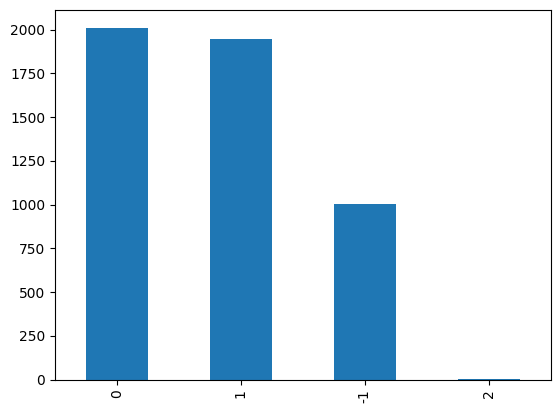

In [ ]:
Sentiment_DataFrame['Label'].value_counts().plot.bar()

In [ ]:
Sentiment_DataFrame = Sentiment_DataFrame[ Sentiment_DataFrame['Label'] != 2 ]

In [ ]:
# Relabeling These 2's

In [ ]:
Train, Test  = train_test_split( Sentiment_DataFrame, test_size=0.2 , random_state=42)

In [ ]:
Train, Valid = train_test_split( Sentiment_DataFrame, test_size=0.15, random_state=42)

In [ ]:
train_labels = Train['Label']
valid_labels = Valid['Label']
test_labels  = Test ['Label']

In [ ]:
train_text = Train['Text_Normalized_and_Tokenized']
valid_text = Valid['Text_Normalized_and_Tokenized']
test_text  = Test ['Text_Normalized_and_Tokenized']

In [ ]:
from datasets import Dataset, DatasetDict

ds = DatasetDict()

train_ds = Dataset.from_pandas(Train)
valid_ds = Dataset.from_pandas(Valid)
test_ds  = Dataset.from_pandas(Test )

ds['train'] = train_ds
ds['valid'] = valid_ds
ds['test' ] = test_ds

ds = ds.remove_columns(["__index_level_0__", 'Text', 'MS', 'Hard', 'Text_Normalized_and_Tokenized'])
ds = ds.rename_column('Text_Normalized', "text")
ds = ds.rename_column('Label', "labels")


print(ds)

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 4215
    })
    valid: Dataset({
        features: ['labels', 'text'],
        num_rows: 744
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 992
    })
})


In [ ]:
from datasets import Dataset, DatasetDict

ds = DatasetDict()

train_ds = Dataset.from_pandas(Train)
test_ds  = Dataset.from_pandas(Test )

ds['train'] = train_ds
ds['test' ] = test_ds

ds = ds.remove_columns(["__index_level_0__", 'Text', 'MS', 'Hard', 'Text_Normalized_and_Tokenized'])
ds = ds.rename_column('Text_Normalized', "text")
ds = ds.rename_column('Label', "labels")


print(ds)

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 3967
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 992
    })
})


## **Bag of Word Sentiment**

### CountVectorizer

In [ ]:
# https://dropsofai.com/sentiment-analysis-with-python-bag-of-words/

In [ ]:
#(UniGram) bag-of-words features
#(UniGram + BiGram) bag-of-words features
#(UniGram + BiGram + TriGram) bag-of-words features

In [ ]:
import sklearn
from sklearn.naive_bayes import MultinomialNB

#### **UniGram**

In [ ]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False, ngram_range=(1,1))

tf_features_train = vectorizer.fit_transform(train_text)
tf_features_valid = vectorizer.transform    (valid_text)
tf_features_test  = vectorizer.transform    (test_text )

In [ ]:
print (tf_features_train.shape, tf_features_test.shape)

(4463, 5269) (992, 5269)


In [ ]:
clf = sklearn.linear_model.LogisticRegression()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[-1, 0, 1]))

              precision    recall  f1-score   support

          -1       0.76      0.70      0.73       215
           0       0.78      0.79      0.78       400
           1       0.76      0.78      0.77       377

    accuracy                           0.77       992
   macro avg       0.76      0.76      0.76       992
weighted avg       0.77      0.77      0.76       992

[[151  35  29]
 [ 19 315  66]
 [ 28  56 293]]


In [ ]:
clf = sklearn.svm.LinearSVC()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[-1, 0, 1]))

              precision    recall  f1-score   support

          -1       0.82      0.74      0.78       215
           0       0.80      0.80      0.80       400
           1       0.77      0.81      0.79       377

    accuracy                           0.79       992
   macro avg       0.80      0.78      0.79       992
weighted avg       0.79      0.79      0.79       992

[[159  31  25]
 [ 11 321  68]
 [ 23  49 305]]


In [ ]:
clf = sklearn.naive_bayes.MultinomialNB()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[-1, 0, 1]))

              precision    recall  f1-score   support

          -1       0.63      0.60      0.61       215
           0       0.63      0.81      0.71       400
           1       0.72      0.52      0.61       377

    accuracy                           0.66       992
   macro avg       0.66      0.65      0.64       992
weighted avg       0.67      0.66      0.65       992

[[129  54  32]
 [ 32 325  43]
 [ 44 136 197]]


#### **BiGram**

In [ ]:
#(UniGram + BiGram)

In [ ]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False, ngram_range=(1,2))

tf_features_train = vectorizer.fit_transform(train_text)
tf_features_valid = vectorizer.transform    (valid_text)
tf_features_test  = vectorizer.transform    (test_text )

In [ ]:
print (tf_features_train.shape, tf_features_test.shape)

(4463, 57096) (992, 57096)


In [ ]:
clf = sklearn.linear_model.LogisticRegression()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[-1, 0, 1]))

              precision    recall  f1-score   support

          -1       0.88      0.74      0.81       215
           0       0.79      0.86      0.83       400
           1       0.82      0.82      0.82       377

    accuracy                           0.82       992
   macro avg       0.83      0.81      0.82       992
weighted avg       0.82      0.82      0.82       992

[[160  34  21]
 [  8 345  47]
 [ 14  55 308]]


In [ ]:
clf = sklearn.svm.LinearSVC()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[-1, 0, 1]))

              precision    recall  f1-score   support

          -1       0.86      0.74      0.80       215
           0       0.79      0.85      0.82       400
           1       0.81      0.81      0.81       377

    accuracy                           0.81       992
   macro avg       0.82      0.80      0.81       992
weighted avg       0.81      0.81      0.81       992

[[159  33  23]
 [ 10 339  51]
 [ 15  55 307]]


In [ ]:
clf = sklearn.naive_bayes.MultinomialNB()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[-1, 0, 1]))

              precision    recall  f1-score   support

          -1       0.83      0.58      0.68       215
           0       0.69      0.85      0.76       400
           1       0.75      0.70      0.72       377

    accuracy                           0.73       992
   macro avg       0.76      0.71      0.72       992
weighted avg       0.74      0.73      0.73       992

[[124  50  41]
 [ 13 339  48]
 [ 13 101 263]]


#### **TriGram**

In [ ]:
#(UniGram + BiGram + TriGram)

In [ ]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False, ngram_range=(1,3))

tf_features_train = vectorizer.fit_transform(train_text)
tf_features_valid = vectorizer.transform    (valid_text)
tf_features_test  = vectorizer.transform    (test_text )

In [ ]:
print (tf_features_train.shape, tf_features_test.shape)

(4463, 143065) (992, 143065)


In [ ]:
clf = sklearn.linear_model.LogisticRegression()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[-1, 0, 1]))

              precision    recall  f1-score   support

          -1       0.89      0.75      0.82       215
           0       0.79      0.87      0.83       400
           1       0.82      0.81      0.82       377

    accuracy                           0.82       992
   macro avg       0.84      0.81      0.82       992
weighted avg       0.83      0.82      0.82       992

[[161  32  22]
 [  7 348  45]
 [ 12  58 307]]


In [ ]:
clf = sklearn.svm.LinearSVC()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[-1, 0, 1]))

              precision    recall  f1-score   support

          -1       0.87      0.75      0.80       215
           0       0.79      0.86      0.82       400
           1       0.81      0.81      0.81       377

    accuracy                           0.81       992
   macro avg       0.82      0.80      0.81       992
weighted avg       0.82      0.81      0.81       992

[[161  30  24]
 [ 10 343  47]
 [ 14  59 304]]


In [ ]:
clf = sklearn.naive_bayes.MultinomialNB()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[-1, 0, 1]))

              precision    recall  f1-score   support

          -1       0.88      0.62      0.73       215
           0       0.74      0.85      0.79       400
           1       0.77      0.77      0.77       377

    accuracy                           0.77       992
   macro avg       0.80      0.75      0.76       992
weighted avg       0.78      0.77      0.77       992

[[133  44  38]
 [ 11 342  47]
 [  7  79 291]]


### TfidfVectorizer

#### **UniGram**

In [ ]:
tf_idf_vec = sklearn.feature_extraction.text.TfidfVectorizer(use_idf=True, smooth_idf=False, ngram_range=(1,1))

In [ ]:
tf_features_train = tf_idf_vec.fit_transform(train_text)
tf_features_valid = tf_idf_vec.transform    (valid_text)
tf_features_test  = tf_idf_vec.transform    (test_text )

In [ ]:
print (tf_features_train.shape, tf_features_test.shape)

(4463, 5269) (992, 5269)


In [ ]:
clf = sklearn.linear_model.LogisticRegression()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[-1, 0, 1]))

              precision    recall  f1-score   support

          -1       0.79      0.58      0.67       215
           0       0.70      0.81      0.75       400
           1       0.73      0.73      0.73       377

    accuracy                           0.73       992
   macro avg       0.74      0.70      0.71       992
weighted avg       0.73      0.73      0.72       992

[[124  55  36]
 [ 15 322  63]
 [ 18  85 274]]


In [ ]:
clf = sklearn.svm.LinearSVC()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[-1, 0, 1]))

              precision    recall  f1-score   support

          -1       0.81      0.67      0.73       215
           0       0.74      0.79      0.76       400
           1       0.74      0.77      0.75       377

    accuracy                           0.75       992
   macro avg       0.76      0.74      0.75       992
weighted avg       0.75      0.75      0.75       992

[[143  42  30]
 [ 14 314  72]
 [ 19  69 289]]


In [ ]:
clf = sklearn.naive_bayes.MultinomialNB()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[-1, 0, 1]))

              precision    recall  f1-score   support

          -1       0.95      0.28      0.44       215
           0       0.65      0.80      0.71       400
           1       0.61      0.71      0.66       377

    accuracy                           0.65       992
   macro avg       0.74      0.60      0.60       992
weighted avg       0.70      0.65      0.63       992

[[ 61  66  88]
 [  1 319  80]
 [  2 108 267]]


## **LSTM Sentiment**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [ ]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers

In [ ]:
train_text = Train['Text_Normalized_and_Tokenized']
valid_text = Valid['Text_Normalized_and_Tokenized']
test_text  = Test ['Text_Normalized_and_Tokenized']

train_labels = Train['Label']
valid_labels = Valid['Label']
test_labels  = Test ['Label']

In [ ]:
tokenizer = Tokenizer(num_words=20000, split=' ', oov_token="<OOV>")
tokenizer.fit_on_texts(train_text.values)
X = tokenizer.texts_to_sequences(train_text.values)
X = pad_sequences(X, maxlen=100, padding='post')

In [ ]:
X.shape

(4463, 100)

In [ ]:
print( tokenizer.word_index )

{'<OOV>': 1, 'num': 2, 'بورس': 3, '2': 4, '1': 5, '3': 6, 'بازار': 7, 'درصد': 8, 'اس': 9, 'شرک': 10, '4': 11, 'میلیارد': 12, 'ماه': 13, 'کالا': 14, 'فرو': 15, 'س': 16, 'عرضه': 17, 'سال': 18, 'تو': 19, 'رشد': 20, 'خودرو': 21, 'هزار': 22, 'معامل': 23, 'شاخص': 24, 'سود': 25, 'سرمایه': 26, 'نسب': 27, 'ریال': 28, 'امروز': 29, '٫': 30, 'ق': 31, 'گذشته': 32, 'افزا': 33, 'سه': 34, 'هفته': 35, 'داشته': 36, 'واحد': 37, 'tag': 38, '✅': 39, 'بوده': 40, 'قبل': 41, 'ساز': 42, '٪': 43, 'کاه': 44, 'می\u200cشود': 45, 'ماهه': 46, 'مال': 47, 'ارز': 48, 'نرخ': 49, 'کرده': 50, 'میلیون': 51, 'صندوق': 52, 'مشابه': 53, 'پا': 54, 'بانک': 55, 'اوراق': 56, 'ایر': 57, 'دو': 58, 'اف': 59, 'محصول': 60, 'می\u200cدهد': 61, 'خواهد': 62, 'عدال': 63, 'نماد': 64, 'تهر': 65, 'تولید': 66, 'تغییر': 67, 'سهامدار': 68, 'فرابورس': 69, 'دول': 70, 'گزار': 71, 'سکه': 72, 'روند': 73, 'قرار': 74, 'ب': 75, 'دوره': 76, 'بررس': 77, 'ثب': 78, 'درامد': 79, 'اقتصاد': 80, 'داد': 81, 'رسیده': 82, 'ک': 83, 'مقدار': 84, 'کدال': 85, 'نیز': 86

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_text)
vocab_size=len(tokenizer.word_index)+1

print(f'Vocab Size: {vocab_size}')
X_train=pad_sequences(tokenizer.texts_to_sequences(train_text), maxlen=128)
X_valid=pad_sequences(tokenizer.texts_to_sequences(valid_text), maxlen=128)
X_test =pad_sequences(tokenizer.texts_to_sequences(test_text ), maxlen=128)

y_train=to_categorical(train_labels, num_classes=3)
y_valid=to_categorical(valid_labels, num_classes=3)
y_test =to_categorical(test_labels, num_classes=3)

# Create an LSTM model with an Embedding layer and fit training data
model=Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=128))
model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(layers.Dense(3,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=512, epochs=10, validation_data=(X_valid, y_valid))

In [ ]:
embed_dim = 128
lstm_out  = 196

tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_text)
vocab_size=len(tokenizer.word_index)+1

print(f'Vocab Size: {vocab_size}')
X_train=pad_sequences(tokenizer.texts_to_sequences(Train['Text_Normalized']), maxlen=X.shape[1])
X_valid=pad_sequences(tokenizer.texts_to_sequences(Valid['Text_Normalized']), maxlen=X.shape[1])
X_test =pad_sequences(tokenizer.texts_to_sequences(Test ['Text_Normalized']), maxlen=X.shape[1])

y_train=to_categorical(train_labels, num_classes=3)
y_valid=to_categorical(valid_labels, num_classes=3)
y_test =to_categorical(test_labels , num_classes=3)

# Create an LSTM model with an Embedding layer and fit training data
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=512, epochs=15, validation_data=(X_valid, y_valid))

Vocab Size: 5395
Epoch 1/15
8/8 [==============================] - 32s 4s/step - loss: 1.0761 - accuracy: 0.4598 - val_loss: 1.0516 - val_accuracy: 0.5016
Epoch 2/15
8/8 [==============================] - 35s 5s/step - loss: 1.0262 - accuracy: 0.5429 - val_loss: 1.0021 - val_accuracy: 0.5508
Epoch 3/15
8/8 [==============================] - 31s 4s/step - loss: 0.9534 - accuracy: 0.5655 - val_loss: 0.9753 - val_accuracy: 0.5548
Epoch 4/15
8/8 [==============================] - 29s 4s/step - loss: 0.8939 - accuracy: 0.5878 - val_loss: 0.9247 - val_accuracy: 0.5605
Epoch 5/15
8/8 [==============================] - 28s 4s/step - loss: 0.8373 - accuracy: 0.6104 - val_loss: 0.9114 - val_accuracy: 0.5790
Epoch 6/15
8/8 [==============================] - 29s 4s/step - loss: 0.7803 - accuracy: 0.6572 - val_loss: 0.8781 - val_accuracy: 0.6137
Epoch 7/15
8/8 [==============================] - 31s 4s/step - loss: 0.7230 - accuracy: 0.6959 - val_loss: 0.8692 - val_accuracy: 0.6185
Epoch 8/15
8/8 [=

In [ ]:
model.evaluate(X_test, y_test, verbose = 2)

31/31 - 2s - loss: 1.0267 - accuracy: 0.6361 - 2s/epoch - 79ms/step


[1.0267432928085327, 0.6360887289047241]

In [ ]:
embed_dim = 128
lstm_out  = 196

tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_text)
vocab_size=len(tokenizer.word_index)+1

print(f'Vocab Size: {vocab_size}')
X_train=pad_sequences(tokenizer.texts_to_sequences(train_text), maxlen=X.shape[1])
X_valid=pad_sequences(tokenizer.texts_to_sequences(valid_text), maxlen=X.shape[1])
X_test =pad_sequences(tokenizer.texts_to_sequences(test_text ), maxlen=X.shape[1])

y_train=to_categorical(train_labels, num_classes=3)
y_valid=to_categorical(valid_labels, num_classes=3)
y_test =to_categorical(test_labels , num_classes=3)

# Create an LSTM model with an Embedding layer and fit training data
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=512, epochs=15, validation_data=(X_valid, y_valid))

Vocab Size: 5779
Epoch 1/15
9/9 [==============================] - 87s 9s/step - loss: 1.0565 - accuracy: 0.4322 - val_loss: 1.0042 - val_accuracy: 0.5565
Epoch 2/15
9/9 [==============================] - 100s 12s/step - loss: 0.9644 - accuracy: 0.5398 - val_loss: 0.9395 - val_accuracy: 0.5645
Epoch 3/15
9/9 [==============================] - 68s 8s/step - loss: 0.8623 - accuracy: 0.6030 - val_loss: 0.8612 - val_accuracy: 0.6008
Epoch 4/15
9/9 [==============================] - 71s 8s/step - loss: 0.7308 - accuracy: 0.6845 - val_loss: 0.8273 - val_accuracy: 0.6593
Epoch 5/15
9/9 [==============================] - 70s 8s/step - loss: 0.6331 - accuracy: 0.7329 - val_loss: 0.8383 - val_accuracy: 0.6351
Epoch 6/15
9/9 [==============================] - 69s 8s/step - loss: 0.5657 - accuracy: 0.7732 - val_loss: 0.8442 - val_accuracy: 0.6230
Epoch 7/15
9/9 [==============================] - 69s 8s/step - loss: 0.5151 - accuracy: 0.7880 - val_loss: 0.9039 - val_accuracy: 0.6331
Epoch 8/15
9/9 

In [ ]:
model.evaluate(X_test, y_test, verbose = 2)

31/31 - 7s - loss: 0.8400 - accuracy: 0.7762 - 7s/epoch - 210ms/step


[0.8399738669395447, 0.7762096524238586]

In [ ]:
model.evaluate(X_test, y_test, verbose = 2)

31/31 - 3s - loss: 0.6732 - accuracy: 0.7540 - 3s/epoch - 82ms/step


[0.6732251644134521, 0.7540322542190552]

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_text)
vocab_size=len(tokenizer.word_index)+1

print(f'Vocab Size: {vocab_size}')
X_train=pad_sequences(tokenizer.texts_to_sequences(train_text), maxlen=128)
X_valid=pad_sequences(tokenizer.texts_to_sequences(valid_text), maxlen=128)
X_test =pad_sequences(tokenizer.texts_to_sequences(test_text ), maxlen=128)

y_train=to_categorical(train_labels, num_classes=3)
y_valid=to_categorical(valid_labels, num_classes=3)
y_test =to_categorical(test_labels, num_classes=3)

# Create an LSTM model with an Embedding layer and fit training data
model=Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=128))
model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(layers.Dense(3,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=512, epochs=10, validation_data=(X_valid, y_valid))

Vocab Size: 5779
Epoch 1/20
18/18 [==============================] - 52s 2s/step - loss: 1.0435 - accuracy: 0.4589 - val_loss: 0.9917 - val_accuracy: 0.5433
Epoch 2/20
18/18 [==============================] - 41s 2s/step - loss: 0.9205 - accuracy: 0.5814 - val_loss: 0.8885 - val_accuracy: 0.5796
Epoch 3/20
18/18 [==============================] - 39s 2s/step - loss: 0.7785 - accuracy: 0.6585 - val_loss: 0.7891 - val_accuracy: 0.6573
Epoch 4/20
18/18 [==============================] - 34s 2s/step - loss: 0.6356 - accuracy: 0.7477 - val_loss: 0.7101 - val_accuracy: 0.6956
Epoch 5/20
18/18 [==============================] - 31s 2s/step - loss: 0.5007 - accuracy: 0.8019 - val_loss: 0.6737 - val_accuracy: 0.7510
Epoch 6/20
18/18 [==============================] - 34s 2s/step - loss: 0.4206 - accuracy: 0.8418 - val_loss: 0.6423 - val_accuracy: 0.7540
Epoch 7/20
18/18 [==============================] - 31s 2s/step - loss: 0.3430 - accuracy: 0.8736 - val_loss: 0.6554 - val_accuracy: 0.7671
Epo

In [ ]:
model.evaluate(X_test, y_test, verbose = 2)

31/31 - 5s - loss: 0.9502 - accuracy: 0.7964 - 5s/epoch - 167ms/step


[0.9502384066581726, 0.7963709831237793]

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_text)
vocab_size=len(tokenizer.word_index)+1

print(f'Vocab Size: {vocab_size}')
X_train=pad_sequences(tokenizer.texts_to_sequences(train_text), maxlen=128)
X_valid=pad_sequences(tokenizer.texts_to_sequences(valid_text), maxlen=128)
X_test =pad_sequences(tokenizer.texts_to_sequences(test_text ), maxlen=128)

y_train=to_categorical(train_labels, num_classes=3)
y_valid=to_categorical(valid_labels, num_classes=3)
y_test =to_categorical(test_labels, num_classes=3)

# Create an LSTM model with an Embedding layer and fit training data
model=Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=128))
model.add(SpatialDropout1D(0.3))
model.add(layers.Bidirectional(layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(layers.Dense(3,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=512, epochs=15, validation_data=(X_valid, y_valid))

Vocab Size: 5395
Epoch 1/15
8/8 [==============================] - 62s 7s/step - loss: 1.0676 - accuracy: 0.4523 - val_loss: 1.0489 - val_accuracy: 0.5121
Epoch 2/15
8/8 [==============================] - 47s 6s/step - loss: 1.0062 - accuracy: 0.5343 - val_loss: 0.9727 - val_accuracy: 0.5629
Epoch 3/15
8/8 [==============================] - 44s 5s/step - loss: 0.9366 - accuracy: 0.5706 - val_loss: 0.9220 - val_accuracy: 0.5613
Epoch 4/15
8/8 [==============================] - 44s 5s/step - loss: 0.8519 - accuracy: 0.6023 - val_loss: 0.8858 - val_accuracy: 0.5935
Epoch 5/15
8/8 [==============================] - 44s 6s/step - loss: 0.7791 - accuracy: 0.6733 - val_loss: 0.8672 - val_accuracy: 0.6073
Epoch 6/15
8/8 [==============================] - 48s 6s/step - loss: 0.7076 - accuracy: 0.7083 - val_loss: 0.8550 - val_accuracy: 0.6371
Epoch 7/15
8/8 [==============================] - 50s 6s/step - loss: 0.6192 - accuracy: 0.7537 - val_loss: 0.8837 - val_accuracy: 0.6516
Epoch 8/15
8/8 [=

In [ ]:
model.evaluate(X_test, y_test, verbose = 2)

31/31 - 3s - loss: 1.1817 - accuracy: 0.6139 - 3s/epoch - 104ms/step


[1.1817198991775513, 0.6139112710952759]

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_text)
vocab_size=len(tokenizer.word_index)+1

print(f'Vocab Size: {vocab_size}')
X_train=pad_sequences(tokenizer.texts_to_sequences(train_text), maxlen=128)
X_valid=pad_sequences(tokenizer.texts_to_sequences(valid_text), maxlen=128)
X_test =pad_sequences(tokenizer.texts_to_sequences(test_text ), maxlen=128)

y_train=to_categorical(train_labels, num_classes=3)
y_valid=to_categorical(valid_labels, num_classes=3)
y_test =to_categorical(test_labels, num_classes=3)

# Create an LSTM model with an Embedding layer and fit training data
model=Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=128))
model.add(layers.Bidirectional(layers.LSTM(128, dropout=0.2)))
model.add(layers.Dense(3,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=512, epochs=10, validation_data=(X_valid, y_valid))

Vocab Size: 5658
Epoch 1/15
9/9 [==============================] - 40s 3s/step - loss: 1.0567 - accuracy: 0.4633 - val_loss: 1.0404 - val_accuracy: 0.5349
Epoch 2/15
9/9 [==============================] - 30s 3s/step - loss: 0.9873 - accuracy: 0.5348 - val_loss: 0.9502 - val_accuracy: 0.5591
Epoch 3/15
9/9 [==============================] - 46s 5s/step - loss: 0.8937 - accuracy: 0.5784 - val_loss: 0.9888 - val_accuracy: 0.5685
Epoch 4/15
9/9 [==============================] - 49s 5s/step - loss: 0.8424 - accuracy: 0.6299 - val_loss: 0.8884 - val_accuracy: 0.6008
Epoch 5/15
9/9 [==============================] - 32s 3s/step - loss: 0.7682 - accuracy: 0.6724 - val_loss: 0.8840 - val_accuracy: 0.6263
Epoch 6/15
9/9 [==============================] - 29s 3s/step - loss: 0.6890 - accuracy: 0.7243 - val_loss: 0.8391 - val_accuracy: 0.6384
Epoch 7/15
9/9 [==============================] - 30s 3s/step - loss: 0.6005 - accuracy: 0.7575 - val_loss: 0.8370 - val_accuracy: 0.6667
Epoch 8/15
9/9 [=

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test, y_test, verbose = 2)

31/31 - 4s - loss: 0.8161 - accuracy: 0.7016 - 4s/epoch - 141ms/step


[0.8160539865493774, 0.7016128897666931]

In [ ]:
from keras import optimizers
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Embedding, Dropout
from keras.layers import GlobalMaxPool1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import CuDNNLSTM, LSTM, Bidirectional
from keras.layers.convolutional import Conv1D

In [ ]:
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=128))
model_cnn.add(Conv1D(filters=64, kernel_size=4, activation='relu', padding='same'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(filters=64, kernel_size=8, activation='relu', padding='same'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(filters=64, kernel_size=16, activation='relu', padding='same'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dropout(0.1))
model_cnn.add(Dense(500, activation="sigmoid"))
model_cnn.add(Dense(3, activation='softmax'))

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_cnn.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
17/17 [==============================] - 11s 567ms/step - loss: 1.2312 - accuracy: 0.3585 - val_loss: 1.0728 - val_accuracy: 0.4099
Epoch 2/10
17/17 [==============================] - 12s 666ms/step - loss: 1.0582 - accuracy: 0.4031 - val_loss: 1.0557 - val_accuracy: 0.5054
Epoch 3/10
17/17 [==============================] - 10s 582ms/step - loss: 1.0118 - accuracy: 0.5117 - val_loss: 0.9652 - val_accuracy: 0.5605
Epoch 4/10
17/17 [==============================] - 7s 407ms/step - loss: 0.9008 - accuracy: 0.5974 - val_loss: 0.9376 - val_accuracy: 0.5726
Epoch 5/10
17/17 [==============================] - 10s 570ms/step - loss: 0.7934 - accuracy: 0.6493 - val_loss: 0.9619 - val_accuracy: 0.5699
Epoch 6/10
17/17 [==============================] - 13s 796ms/step - loss: 0.6881 - accuracy: 0.6980 - val_loss: 1.0751 - val_accuracy: 0.5632
Epoch 7/10
17/17 [==============================] - 7s 405ms/step - loss: 0.5888 - accuracy: 0.7286 - val_loss: 1.2061 - val_accuracy: 0.5511
E

In [ ]:
model_cnn.evaluate(X_test, y_test, verbose = 2)

31/31 - 0s - loss: 1.0888 - accuracy: 0.6966 - 463ms/epoch - 15ms/step


[1.0887846946716309, 0.6965726017951965]

In [ ]:
model_blstm = Sequential()
model_blstm.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=128))
#model_blstm.add(Bidirectional(CuDNNLSTM(300, return_sequences=True, name='lstm_layer')))
model_blstm.add(Bidirectional(LSTM(int(300/2), activation='tanh', return_sequences=True), merge_mode='concat')) # when using CPU
model_blstm.add(GlobalMaxPool1D())
model_blstm.add(Dropout(0.2))
model_blstm.add(Dense(300, activation="relu"))
model_blstm.add(Dropout(0.1))
model_blstm.add(Dense(3, activation='softmax'))

model_blstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_blstm.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
17/17 [==============================] - 50s 3s/step - loss: 1.0537 - accuracy: 0.4460 - val_loss: 1.0171 - val_accuracy: 0.5565
Epoch 2/10
17/17 [==============================] - 37s 2s/step - loss: 0.9472 - accuracy: 0.5647 - val_loss: 0.9069 - val_accuracy: 0.5766
Epoch 3/10
17/17 [==============================] - 40s 2s/step - loss: 0.7858 - accuracy: 0.6486 - val_loss: 0.9100 - val_accuracy: 0.6116
Epoch 4/10
17/17 [==============================] - 41s 2s/step - loss: 0.6129 - accuracy: 0.7523 - val_loss: 0.8043 - val_accuracy: 0.6640
Epoch 5/10
17/17 [==============================] - 39s 2s/step - loss: 0.4506 - accuracy: 0.8259 - val_loss: 0.9139 - val_accuracy: 0.6384
Epoch 6/10
17/17 [==============================] - 38s 2s/step - loss: 0.3393 - accuracy: 0.8731 - val_loss: 1.0771 - val_accuracy: 0.6237
Epoch 7/10
17/17 [==============================] - 39s 2s/step - loss: 0.2655 - accuracy: 0.9046 - val_loss: 1.3035 - val_accuracy: 0.6169
Epoch 8/10
17/17 [==

In [ ]:
model_blstm.evaluate(X_test, y_test, verbose = 2)

31/31 - 7s - loss: 1.1553 - accuracy: 0.7016 - 7s/epoch - 216ms/step


[1.155346393585205, 0.7016128897666931]

## **Sentiment With BERT Variants (Without PreTrain)**

### **XLM-RoBERTa**

In [ ]:
from transformers import BertTokenizer
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification

tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base', truncation=True, padding=True, model_max_length=512)
model = XLMRobertaForSequenceClassification.from_pretrained('xlm-roberta-base', num_labels=3)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.dense.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.den

In [ ]:
str_to_int = {-1: 0, 0: 1, 1: 2}
def tokenize_function(row):
    tokenized_batch = tokenizer(row["text"], truncation=True)
    tokenized_batch["labels"] = [str_to_int[label] for label in row["labels"]]
    return tokenized_batch

tokenized_datasets = ds.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/4215 [00:00<?, ? examples/s]

Map:   0%|          | 0/744 [00:00<?, ? examples/s]

Map:   0%|          | 0/992 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'text', 'input_ids', 'attention_mask'],
        num_rows: 4215
    })
    valid: Dataset({
        features: ['labels', 'text', 'input_ids', 'attention_mask'],
        num_rows: 744
    })
    test: Dataset({
        features: ['labels', 'text', 'input_ids', 'attention_mask'],
        num_rows: 992
    })
})

In [ ]:
import torch
import gc
torch.cuda.empty_cache()
gc.collect()

169

In [ ]:
from datasets import load_metric

def compute_metrics(pred):
    logits, labels = pred
    predictions    = np.argmax(logits, axis=-1)

    metric1 = load_metric("precision")
    metric2 = load_metric("recall")
    metric3 = load_metric("f1")
    metric4 = load_metric("accuracy")

    precision = metric1.compute(predictions=predictions, references=labels, average="micro")["precision"]
    recall    = metric2.compute(predictions=predictions, references=labels, average="micro")["recall"]
    f1        = metric3.compute(predictions=predictions, references=labels, average="micro")["f1"]
    accuracy  = metric4.compute(predictions=predictions, references=labels ,)["accuracy"]
    return {"precision": precision, "recall": recall, "accuracy":accuracy, "f1":f1}


training_args_2 = TrainingArguments(
    output_dir                  = "Xlmbert_without_pretrain",
    learning_rate               = 5e-6,
    per_device_train_batch_size = 8,
    per_device_eval_batch_size  = 8,
    num_train_epochs            = 6,

    gradient_accumulation_steps = 1,
    overwrite_output_dir        = True,
    save_strategy               = "epoch",
    evaluation_strategy         = "epoch",
    load_best_model_at_end      = True,
    metric_for_best_model       = "accuracy",
    save_strategy               = "no"
)

trainer = Trainer(
    model         = model,
    args          = training_args_2,
    train_dataset = tokenized_datasets["train"],
    eval_dataset  = tokenized_datasets["valid"],
    tokenizer     = tokenizer,
    compute_metrics = compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,Accuracy,F1
1,0.880700,0.712042,0.693548,0.693548,0.693548,0.693548
2,0.728700,0.697234,0.711022,0.711022,0.711022,0.711022
3,0.654900,0.725303,0.709677,0.709677,0.709677,0.709677
4,0.605800,0.706847,0.720430,0.720430,0.720430,0.720430
5,0.557900,0.733437,0.706989,0.706989,0.706989,0.706989
6,0.517700,0.751531,0.701613,0.701613,0.701613,0.701613


TrainOutput(global_step=3162, training_loss=0.6505418279214723, metrics={'train_runtime': 1148.3876, 'train_samples_per_second': 22.022, 'train_steps_per_second': 2.753, 'total_flos': 1924281008340516.0, 'train_loss': 0.6505418279214723, 'epoch': 6.0})

In [ ]:
pred_1 = trainer.predict(tokenized_datasets["test"])

In [ ]:
print( classification_report( pred_1.label_ids , pred_1.predictions.argmax(-1) , labels=[0, 1, 2]) )

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       215
           1       0.72      0.73      0.73       400
           2       0.75      0.72      0.73       377

    accuracy                           0.73       992
   macro avg       0.73      0.73      0.73       992
weighted avg       0.73      0.73      0.73       992



### **ParsBERT**

In [ ]:
config_2    = AutoConfig   .from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
tokenizer_2 = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased", truncation=True, padding=True, model_max_length=512)
model_2     = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-base-parsbert-uncased", num_labels=3)

Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassifica

In [ ]:
str_to_int = {-1: 0, 0: 1, 1: 2}
def tokenize_function(row):
    tokenized_batch = tokenizer_2(row["text"], truncation=True)
    tokenized_batch["labels"] = [str_to_int[label] for label in row["labels"]]
    return tokenized_batch

tokenized_datasets = ds.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/4215 [00:00<?, ? examples/s]

Map:   0%|          | 0/744 [00:00<?, ? examples/s]

Map:   0%|          | 0/992 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4215
    })
    valid: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 744
    })
    test: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 992
    })
})

In [ ]:
from datasets import load_metric

def compute_metrics(pred):
    logits, labels = pred
    predictions    = np.argmax(logits, axis=-1)

    metric1 = load_metric("precision")
    metric2 = load_metric("recall")
    metric3 = load_metric("f1")
    metric4 = load_metric("accuracy")

    precision = metric1.compute(predictions=predictions, references=labels, average="micro")["precision"]
    recall    = metric2.compute(predictions=predictions, references=labels, average="micro")["recall"]
    f1        = metric3.compute(predictions=predictions, references=labels, average="micro")["f1"]
    accuracy  = metric4.compute(predictions=predictions, references=labels ,)["accuracy"]
    return {"precision": precision, "recall": recall, "accuracy":accuracy, "f1":f1}


training_args_2 = TrainingArguments(
    output_dir                  = "parsbert_without_pretrain",
    learning_rate               = 2e-6,
    per_device_train_batch_size = 8,
    per_device_eval_batch_size  = 8,
    num_train_epochs            = 6,

    gradient_accumulation_steps = 1,
    overwrite_output_dir        = True,
    #save_strategy               = "epoch",
    evaluation_strategy         = "epoch",
    #load_best_model_at_end      = True,
    metric_for_best_model       = "accuracy",
    save_strategy               = "no"
)

trainer = Trainer(
    model         = model_2,
    args          = training_args_2,
    train_dataset = tokenized_datasets["train"],
    eval_dataset  = tokenized_datasets["valid"],
    tokenizer     = tokenizer_2,
    compute_metrics = compute_metrics,
)

trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Precision,Recall,Accuracy,F1
1,0.927500,0.834330,0.634409,0.634409,0.634409,0.634409
2,0.757900,0.714724,0.681452,0.681452,0.681452,0.681452
3,0.656600,0.697381,0.696237,0.696237,0.696237,0.696237
4,0.619600,0.686175,0.701613,0.701613,0.701613,0.701613
5,0.594800,0.682300,0.698925,0.698925,0.698925,0.698925
6,0.572500,0.681591,0.700269,0.700269,0.700269,0.700269


TrainOutput(global_step=3162, training_loss=0.6806542446611804, metrics={'train_runtime': 717.4645, 'train_samples_per_second': 35.249, 'train_steps_per_second': 4.407, 'total_flos': 1564019641730574.0, 'train_loss': 0.6806542446611804, 'epoch': 6.0})

In [ ]:
pred_2 = trainer.predict(tokenized_datasets["test"])

In [ ]:
print( classification_report( pred_2.label_ids , pred_2.predictions.argmax(-1) , labels=[0, 1, 2]) )

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       215
           1       0.70      0.74      0.72       400
           2       0.73      0.70      0.71       377

    accuracy                           0.72       992
   macro avg       0.72      0.72      0.72       992
weighted avg       0.72      0.72      0.72       992



### **mBERT**

In [ ]:
config_3    = AutoConfig   .from_pretrained("bert-base-multilingual-uncased")
tokenizer_3 = AutoTokenizer.from_pretrained("bert-base-multilingual-uncased", truncation=True, padding=True, model_max_length=512)
model_3     = AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-uncased", num_labels=3)

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingu

In [ ]:
str_to_int = {-1: 0, 0: 1, 1: 2}
def tokenize_function(row):
    tokenized_batch = tokenizer_3(row["text"], truncation=True)
    tokenized_batch["labels"] = [str_to_int[label] for label in row["labels"]]
    return tokenized_batch

tokenized_datasets = ds.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/4215 [00:00<?, ? examples/s]

Map:   0%|          | 0/744 [00:00<?, ? examples/s]

Map:   0%|          | 0/992 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4215
    })
    valid: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 744
    })
    test: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 992
    })
})

In [ ]:
from datasets import load_metric

def compute_metrics(pred):
    logits, labels = pred
    predictions    = np.argmax(logits, axis=-1)

    metric1 = load_metric("precision")
    metric2 = load_metric("recall")
    metric3 = load_metric("f1")
    metric4 = load_metric("accuracy")

    precision = metric1.compute(predictions=predictions, references=labels, average="micro")["precision"]
    recall    = metric2.compute(predictions=predictions, references=labels, average="micro")["recall"]
    f1        = metric3.compute(predictions=predictions, references=labels, average="micro")["f1"]
    accuracy  = metric4.compute(predictions=predictions, references=labels ,)["accuracy"]
    return {"precision": precision, "recall": recall, "accuracy":accuracy, "f1":f1}


training_args_3 = TrainingArguments(
    output_dir                  = "mbert_without_pretrain",
    learning_rate               = 2e-6,
    per_device_train_batch_size = 8,
    per_device_eval_batch_size  = 8,
    num_train_epochs            = 6,

    gradient_accumulation_steps = 1,
    overwrite_output_dir        = True,
    #save_strategy               = "epoch",
    evaluation_strategy         = "epoch",
    #load_best_model_at_end      = True,
    metric_for_best_model       = "accuracy",
    save_strategy               = "no"
)

trainer = Trainer(
    model         = model_3,
    args          = training_args_3,
    train_dataset = tokenized_datasets["train"],
    eval_dataset  = tokenized_datasets["valid"],
    tokenizer     = tokenizer_3,
    compute_metrics = compute_metrics,
)

trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Precision,Recall,Accuracy,F1
1,0.947600,0.837676,0.641129,0.641129,0.641129,0.641129
2,0.801100,0.781002,0.668011,0.668011,0.668011,0.668011
3,0.723900,0.760380,0.672043,0.672043,0.672043,0.672043
4,0.682000,0.748687,0.686828,0.686828,0.686828,0.686828
5,0.656500,0.745295,0.694892,0.694892,0.694892,0.694892
6,0.631700,0.746560,0.682796,0.682796,0.682796,0.682796


TrainOutput(global_step=3162, training_loss=0.7345328382266465, metrics={'train_runtime': 945.0114, 'train_samples_per_second': 26.762, 'train_steps_per_second': 3.346, 'total_flos': 2208716376878970.0, 'train_loss': 0.7345328382266465, 'epoch': 6.0})

In [ ]:
pred_3 = trainer.predict(tokenized_datasets["test"])

In [ ]:
print( classification_report( pred_3.label_ids , pred_3.predictions.argmax(-1) , labels=[0, 1, 2]) )

              precision    recall  f1-score   support

           0       0.68      0.67      0.67       215
           1       0.71      0.72      0.71       400
           2       0.70      0.69      0.70       377

    accuracy                           0.70       992
   macro avg       0.70      0.69      0.69       992
weighted avg       0.70      0.70      0.70       992



### **LaBSE**

In [ ]:
# sentence-transformers/LaBSE
# setu4993/LaBSE
# https://tfhub.dev/google/LaBSE/2

#### **setu4993/LaBSE**

In [ ]:
config_4    = AutoConfig   .from_pretrained("setu4993/LaBSE")
tokenizer_4 = AutoTokenizer.from_pretrained("setu4993/LaBSE", truncation=True, padding=True, model_max_length=512)
model_4     = AutoModelForSequenceClassification.from_pretrained("setu4993/LaBSE", num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at setu4993/LaBSE and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
str_to_int = {-1: 0, 0: 1, 1: 2}
def tokenize_function(row):
    tokenized_batch = tokenizer_4(row["text"], truncation=True)
    tokenized_batch["labels"] = [str_to_int[label] for label in row["labels"]]
    return tokenized_batch

tokenized_datasets = ds.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/4215 [00:00<?, ? examples/s]

Map:   0%|          | 0/744 [00:00<?, ? examples/s]

Map:   0%|          | 0/992 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4215
    })
    valid: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 744
    })
    test: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 992
    })
})

In [ ]:
from datasets import load_metric

def compute_metrics(pred):
    logits, labels = pred
    predictions    = np.argmax(logits, axis=-1)

    metric1 = load_metric("precision")
    metric2 = load_metric("recall")
    metric3 = load_metric("f1")
    metric4 = load_metric("accuracy")

    precision = metric1.compute(predictions=predictions, references=labels, average="micro")["precision"]
    recall    = metric2.compute(predictions=predictions, references=labels, average="micro")["recall"]
    f1        = metric3.compute(predictions=predictions, references=labels, average="micro")["f1"]
    accuracy  = metric4.compute(predictions=predictions, references=labels ,)["accuracy"]
    return {"precision": precision, "recall": recall, "accuracy":accuracy, "f1":f1}


training_args_4 = TrainingArguments(
    output_dir                  = "mbert_without_pretrain",
    learning_rate               = 2e-6,
    per_device_train_batch_size = 8,
    per_device_eval_batch_size  = 8,
    num_train_epochs            = 7,

    gradient_accumulation_steps = 1,
    overwrite_output_dir        = True,
    #save_strategy               = "epoch",
    evaluation_strategy         = "epoch",
    #load_best_model_at_end      = True,
    metric_for_best_model       = "accuracy",
    save_strategy               = "no"
)

trainer = Trainer(
    model         = model_4,
    args          = training_args_4,
    train_dataset = tokenized_datasets["train"],
    eval_dataset  = tokenized_datasets["valid"],
    tokenizer     = tokenizer_4,
    compute_metrics = compute_metrics,
)

trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Precision,Recall,Accuracy,F1
1,0.916000,0.769108,0.653226,0.653226,0.653226,0.653226
2,0.730900,0.711350,0.696237,0.696237,0.696237,0.696237
3,0.666400,0.716217,0.700269,0.700269,0.700269,0.700269
4,0.630300,0.700169,0.702957,0.702957,0.702957,0.702957
5,0.602200,0.694981,0.706989,0.706989,0.706989,0.706989
6,0.582700,0.701859,0.702957,0.702957,0.702957,0.702957
7,0.568700,0.699733,0.708333,0.708333,0.708333,0.708333


TrainOutput(global_step=3689, training_loss=0.6659833494968678, metrics={'train_runtime': 1355.748, 'train_samples_per_second': 21.763, 'train_steps_per_second': 2.721, 'total_flos': 2078531763376950.0, 'train_loss': 0.6659833494968678, 'epoch': 7.0})

In [ ]:
pred_4 = trainer.predict(tokenized_datasets["test"])

In [ ]:
print( classification_report( pred_4.label_ids , pred_4.predictions.argmax(-1) , labels=[0, 1, 2]) )

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       215
           1       0.70      0.72      0.71       400
           2       0.71      0.72      0.72       377

    accuracy                           0.71       992
   macro avg       0.72      0.71      0.72       992
weighted avg       0.72      0.71      0.71       992



#### **HasinMDG/SetFit_Labse_Sentiment_Towards_Topic**

In [ ]:
config_5    = AutoConfig   .from_pretrained("HasinMDG/SetFit_Labse_Sentiment_Towards_Topic")
tokenizer_5 = AutoTokenizer.from_pretrained("HasinMDG/SetFit_Labse_Sentiment_Towards_Topic", truncation=True, padding=True, model_max_length=512)
model_5     = AutoModelForSequenceClassification.from_pretrained("HasinMDG/SetFit_Labse_Sentiment_Towards_Topic", num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HasinMDG/SetFit_Labse_Sentiment_Towards_Topic and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
str_to_int = {-1: 0, 0: 1, 1: 2}
def tokenize_function(row):
    tokenized_batch = tokenizer_5(row["text"], truncation=True)
    tokenized_batch["labels"] = [str_to_int[label] for label in row["labels"]]
    return tokenized_batch

tokenized_datasets = ds.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/4215 [00:00<?, ? examples/s]

Map:   0%|          | 0/744 [00:00<?, ? examples/s]

Map:   0%|          | 0/992 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4215
    })
    valid: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 744
    })
    test: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 992
    })
})

In [ ]:
from datasets import load_metric

def compute_metrics(pred):
    logits, labels = pred
    predictions    = np.argmax(logits, axis=-1)

    metric1 = load_metric("precision")
    metric2 = load_metric("recall")
    metric3 = load_metric("f1")
    metric4 = load_metric("accuracy")

    precision = metric1.compute(predictions=predictions, references=labels, average="micro")["precision"]
    recall    = metric2.compute(predictions=predictions, references=labels, average="micro")["recall"]
    f1        = metric3.compute(predictions=predictions, references=labels, average="micro")["f1"]
    accuracy  = metric4.compute(predictions=predictions, references=labels ,)["accuracy"]
    return {"precision": precision, "recall": recall, "accuracy":accuracy, "f1":f1}


training_args_5 = TrainingArguments(
    output_dir                  = "labse_without_pretrain",
    learning_rate               = 2e-6,
    per_device_train_batch_size = 8,
    per_device_eval_batch_size  = 8,
    num_train_epochs            = 8,

    gradient_accumulation_steps = 1,
    overwrite_output_dir        = True,
    #save_strategy               = "epoch",
    evaluation_strategy         = "epoch",
    #load_best_model_at_end      = True,
    metric_for_best_model       = "accuracy",
    save_strategy               = "no"
)

trainer = Trainer(
    model         = model_5,
    args          = training_args_5,
    train_dataset = tokenized_datasets["train"],
    eval_dataset  = tokenized_datasets["valid"],
    tokenizer     = tokenizer_5,
    compute_metrics = compute_metrics,
)

trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Precision,Recall,Accuracy,F1
1,0.942500,0.802446,0.639785,0.639785,0.639785,0.639785
2,0.766600,0.740165,0.693548,0.693548,0.693548,0.693548


Epoch,Training Loss,Validation Loss,Precision,Recall,Accuracy,F1
1,0.942500,0.802446,0.639785,0.639785,0.639785,0.639785
2,0.766600,0.740165,0.693548,0.693548,0.693548,0.693548
3,0.698700,0.732913,0.684140,0.684140,0.684140,0.684140
4,0.665100,0.716731,0.689516,0.689516,0.689516,0.689516
5,0.640100,0.716226,0.692204,0.692204,0.692204,0.692204
6,0.610800,0.724348,0.704301,0.704301,0.704301,0.704301
7,0.592700,0.720937,0.708333,0.708333,0.708333,0.708333
8,0.607600,0.718856,0.700269,0.700269,0.700269,0.700269


TrainOutput(global_step=4216, training_loss=0.6831406768856736, metrics={'train_runtime': 1576.2323, 'train_samples_per_second': 21.393, 'train_steps_per_second': 2.675, 'total_flos': 2377573009959672.0, 'train_loss': 0.6831406768856736, 'epoch': 8.0})

In [ ]:
pred_5 = trainer.predict(tokenized_datasets["test"])

In [ ]:
print( classification_report( pred_5.label_ids , pred_5.predictions.argmax(-1) , labels=[0, 1, 2]) )

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       215
           1       0.69      0.74      0.72       400
           2       0.72      0.73      0.72       377

    accuracy                           0.72       992
   macro avg       0.73      0.71      0.72       992
weighted avg       0.72      0.72      0.72       992



#### **pvl/labse_bert**

In [ ]:
config_6    = AutoConfig   .from_pretrained("pvl/labse_bert")
tokenizer_6 = AutoTokenizer.from_pretrained("pvl/labse_bert", truncation=True, padding=True, model_max_length=512)
model_6     = AutoModelForSequenceClassification.from_pretrained("pvl/labse_bert", num_labels=3)

Some weights of the model checkpoint at pvl/labse_bert were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized

In [ ]:
str_to_int = {-1: 0, 0: 1, 1: 2}
def tokenize_function(row):
    tokenized_batch = tokenizer_6(row["text"], truncation=True)
    tokenized_batch["labels"] = [str_to_int[label] for label in row["labels"]]
    return tokenized_batch

tokenized_datasets = ds.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/3967 [00:00<?, ? examples/s]

Map:   0%|          | 0/992 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3967
    })
    test: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 992
    })
})

In [ ]:
from datasets import load_metric

def compute_metrics(pred):
    logits, labels = pred
    predictions    = np.argmax(logits, axis=-1)

    metric1 = load_metric("precision")
    metric2 = load_metric("recall")
    metric3 = load_metric("f1")
    metric4 = load_metric("accuracy")

    precision = metric1.compute(predictions=predictions, references=labels, average="micro")["precision"]
    recall    = metric2.compute(predictions=predictions, references=labels, average="micro")["recall"]
    f1        = metric3.compute(predictions=predictions, references=labels, average="micro")["f1"]
    accuracy  = metric4.compute(predictions=predictions, references=labels ,)["accuracy"]
    return {"precision": precision, "recall": recall, "accuracy":accuracy, "f1":f1}


training_args_6 = TrainingArguments(
    output_dir                  = "mbert_without_pretrain",
    learning_rate               = 2e-6,
    per_device_train_batch_size = 8,
    per_device_eval_batch_size  = 8,
    num_train_epochs            = 6,

    gradient_accumulation_steps = 1,
    overwrite_output_dir        = True,
    #save_strategy               = "epoch",
    evaluation_strategy         = "epoch",
    #load_best_model_at_end      = True,
    metric_for_best_model       = "accuracy",
    save_strategy               = "no"
)

trainer = Trainer(
    model         = model_6,
    args          = training_args_6,
    train_dataset = tokenized_datasets["train"],
    eval_dataset  = tokenized_datasets["test"],
    tokenizer     = tokenizer_6,
    compute_metrics = compute_metrics,
)

trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Precision,Recall,Accuracy,F1
1,No log,0.828346,0.630040,0.630040,0.630040,0.630040
2,0.907700,0.735084,0.664315,0.664315,0.664315,0.664315
3,0.738100,0.713794,0.678427,0.678427,0.678427,0.678427
4,0.671100,0.708346,0.683468,0.683468,0.683468,0.683468
5,0.630500,0.701933,0.685484,0.685484,0.685484,0.685484
6,0.615000,0.701530,0.695565,0.695565,0.695565,0.695565


TrainOutput(global_step=2976, training_loss=0.693534061472903, metrics={'train_runtime': 1113.0026, 'train_samples_per_second': 21.385, 'train_steps_per_second': 2.674, 'total_flos': 1686611480336244.0, 'train_loss': 0.693534061472903, 'epoch': 6.0})

In [ ]:
pred_6 = trainer.predict(tokenized_datasets["test"])

In [ ]:
print( classification_report( pred_6.label_ids , pred_6.predictions.argmax(-1) , labels=[0, 1, 2]) )

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       215
           1       0.68      0.72      0.70       400
           2       0.70      0.69      0.69       377

    accuracy                           0.70       992
   macro avg       0.70      0.69      0.69       992
weighted avg       0.70      0.70      0.70       992



#### **HasinMDG/X-Sent-LaBSE_v5**

In [ ]:
config_7    = AutoConfig   .from_pretrained("HasinMDG/X-Sent-LaBSE_v5")
tokenizer_7 = AutoTokenizer.from_pretrained("HasinMDG/X-Sent-LaBSE_v5", truncation=True, padding=True, model_max_length=512)
model_7     = AutoModelForSequenceClassification.from_pretrained("HasinMDG/X-Sent-LaBSE_v5", num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HasinMDG/X-Sent-LaBSE_v5 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
str_to_int = {-1: 0, 0: 1, 1: 2}
def tokenize_function(row):
    tokenized_batch = tokenizer_7(row["text"], truncation=True)
    tokenized_batch["labels"] = [str_to_int[label] for label in row["labels"]]
    return tokenized_batch

tokenized_datasets = ds.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/3967 [00:00<?, ? examples/s]

Map:   0%|          | 0/992 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3967
    })
    test: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 992
    })
})

In [ ]:
from datasets import load_metric

def compute_metrics(pred):
    logits, labels = pred
    predictions    = np.argmax(logits, axis=-1)

    metric1 = load_metric("precision")
    metric2 = load_metric("recall")
    metric3 = load_metric("f1")
    metric4 = load_metric("accuracy")

    precision = metric1.compute(predictions=predictions, references=labels, average="micro")["precision"]
    recall    = metric2.compute(predictions=predictions, references=labels, average="micro")["recall"]
    f1        = metric3.compute(predictions=predictions, references=labels, average="micro")["f1"]
    accuracy  = metric4.compute(predictions=predictions, references=labels ,)["accuracy"]
    return {"precision": precision, "recall": recall, "accuracy":accuracy, "f1":f1}


training_args_7 = TrainingArguments(
    output_dir                  = "mbert_without_pretrain",
    learning_rate               = 2e-6,
    per_device_train_batch_size = 8,
    per_device_eval_batch_size  = 8,
    num_train_epochs            = 8,

    gradient_accumulation_steps = 1,
    overwrite_output_dir        = True,
    #save_strategy               = "epoch",
    evaluation_strategy         = "epoch",
    #load_best_model_at_end      = True,
    metric_for_best_model       = "accuracy",
    save_strategy               = "no"
)

trainer = Trainer(
    model         = model_7,
    args          = training_args_7,
    train_dataset = tokenized_datasets["train"],
    eval_dataset  = tokenized_datasets["test"],
    tokenizer     = tokenizer_7,
    compute_metrics = compute_metrics,
)

trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Precision,Recall,Accuracy,F1
1,No log,0.832816,0.654234,0.654234,0.654234,0.654234
2,0.910700,0.784741,0.683468,0.683468,0.683468,0.683468
3,0.791000,0.775566,0.683468,0.683468,0.683468,0.683468
4,0.752200,0.781677,0.677419,0.677419,0.677419,0.677419
5,0.695600,0.768026,0.688508,0.688508,0.688508,0.688508
6,0.666900,0.775269,0.690524,0.690524,0.690524,0.690524
7,0.643300,0.770046,0.693548,0.693548,0.693548,0.693548
8,0.627400,0.775740,0.694556,0.694556,0.694556,0.694556


TrainOutput(global_step=3968, training_loss=0.7137591146653698, metrics={'train_runtime': 1469.1194, 'train_samples_per_second': 21.602, 'train_steps_per_second': 2.701, 'total_flos': 2242538270605080.0, 'train_loss': 0.7137591146653698, 'epoch': 8.0})

In [ ]:
pred_7 = trainer.predict(tokenized_datasets["test"])

In [ ]:
print( classification_report( pred_7.label_ids , pred_7.predictions.argmax(-1) , labels=[0, 1, 2]) )

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       215
           1       0.68      0.69      0.69       400
           2       0.68      0.71      0.69       377

    accuracy                           0.69       992
   macro avg       0.70      0.69      0.70       992
weighted avg       0.70      0.69      0.69       992



#### **utsav/labse-lora-rotten_tomatoes**

In [ ]:
config_8    = AutoConfig   .from_pretrained("utsav/labse-lora-rotten_tomatoes")
tokenizer_8 = AutoTokenizer.from_pretrained("utsav/labse-lora-rotten_tomatoes", truncation=True, padding=True, model_max_length=512)
model_8     = AutoModelForSequenceClassification.from_pretrained("utsav/labse-lora-rotten_tomatoes", num_labels=3)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_errors.py:259 in                  │
│ hf_raise_for_status                                                                              │
│                                                                                                  │
│   256 │   </Tip>                                                                                 │
│   257 │   """                                                                                    │
│   258 │   try:                                                                                   │
│ ❱ 259 │   │   response.raise_for_status()                                                        │
│   260 │   except HTTPError as e:                                                                 │
│   261 │   │   error_code = response.headers.get("X-Error-Code")                                  │
│   262                                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/requests/models.py:960 in raise_for_status               │
│                                                                                                  │
│   957 │   │   │   http_error_msg = u'%s Server Error: %s for url: %s' % (self.status_code, rea   │
│   958 │   │                                                                                      │
│   959 │   │   if http_error_msg:                                                                 │
│ ❱ 960 │   │   │   raise HTTPError(http_error_msg, response=self)                                 │
│   961 │                                                                                          │
│   962 │   def close(self):                                                                       │
│   963 │   │   """Releases the connection back to the pool. Once this method has been             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
HTTPError: 404 Client Error: Not Found for url: 
https://huggingface.co/utsav/labse-lora-rotten_tomatoes/resolve/main/config.json

The above exception was the direct cause of the following exception:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:417 in cached_file             │
│                                                                                                  │
│    414 │   user_agent = http_user_agent(user_agent)                                              │
│    415 │   try:                                                                                  │
│    416 │   │   # Load from URL or cache if already cached                                        │
│ ❱  417 │   │   resolved_file = hf_hub_download(                                                  │
│    418 │   │   │   path_or_repo_id,                                                              │
│    419 │   │   │   filename,                                                                     │
│    420 │   │   │   subfolder=None if len(subfolder) == 0 else subfolder,                         │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_validators.py:118 in _inner_fn    │
│                                                                                                  │
│   115 │   │   if check_use_auth_token:                                                           │
│   116 │   │   │   kwargs = smoothly_deprecate_use_auth_token(fn_name=fn.__name__, has_token=ha   │
│   117 │   │                                                 

In [ ]:
str_to_int = {-1: 0, 0: 1, 1: 2}
def tokenize_function(row):
    tokenized_batch = tokenizer_8(row["text"], truncation=True)
    tokenized_batch["labels"] = [str_to_int[label] for label in row["labels"]]
    return tokenized_batch

tokenized_datasets = ds.map(tokenize_function, batched=True)
tokenized_datasets

In [ ]:
from datasets import load_metric

def compute_metrics(pred):
    logits, labels = pred
    predictions    = np.argmax(logits, axis=-1)

    metric1 = load_metric("precision")
    metric2 = load_metric("recall")
    metric3 = load_metric("f1")
    metric4 = load_metric("accuracy")

    precision = metric1.compute(predictions=predictions, references=labels, average="micro")["precision"]
    recall    = metric2.compute(predictions=predictions, references=labels, average="micro")["recall"]
    f1        = metric3.compute(predictions=predictions, references=labels, average="micro")["f1"]
    accuracy  = metric4.compute(predictions=predictions, references=labels ,)["accuracy"]
    return {"precision": precision, "recall": recall, "accuracy":accuracy, "f1":f1}


training_args_8 = TrainingArguments(
    output_dir                  = "mbert_without_pretrain",
    learning_rate               = 2e-6,
    per_device_train_batch_size = 8,
    per_device_eval_batch_size  = 8,
    num_train_epochs            = 4,

    gradient_accumulation_steps = 1,
    overwrite_output_dir        = True,
    #save_strategy               = "epoch",
    evaluation_strategy         = "epoch",
    #load_best_model_at_end      = True,
    metric_for_best_model       = "accuracy",
    save_strategy               = "no"
)

trainer = Trainer(
    model         = model_8,
    args          = training_args_8,
    train_dataset = tokenized_datasets["train"],
    eval_dataset  = tokenized_datasets["test"],
    tokenizer     = tokenizer_8,
    compute_metrics = compute_metrics,
)

trainer.train()

In [ ]:
pred_8 = trainer.predict(tokenized_datasets["test"])

In [ ]:
print( classification_report( pred_8.label_ids , pred_8.predictions.argmax(-1) , labels=[0, 1, 2]) )

#### **npleshkanov/adapter_labse_intent_classifier**

In [ ]:
config_9    = AutoConfig   .from_pretrained("npleshkanov/adapter_labse_intent_classifier")
tokenizer_9 = AutoTokenizer.from_pretrained("npleshkanov/adapter_labse_intent_classifier", truncation=True, padding=True, model_max_length=512)
model_9     = AutoModelForSequenceClassification.from_pretrained("npleshkanov/adapter_labse_intent_classifier", num_labels=3)

Some weights of the model checkpoint at npleshkanov/adapter_labse_intent_classifier were not used when initializing BertForSequenceClassification: ['bert.encoder.layer.2.output.adapters.nlu.adapter_up.bias', 'bert.encoder.layer.8.output.adapters.nlu.adapter_up.bias', 'bert.encoder.layer.8.output.adapters.nlu.adapter_down.0.bias', 'bert.encoder.layer.1.output.adapters.nlu.adapter_down.0.weight', 'bert.encoder.layer.5.output.adapters.nlu.adapter_down.0.weight', 'bert.encoder.layer.6.output.adapters.nlu.adapter_up.bias', 'bert.encoder.layer.0.output.adapters.nlu.adapter_up.weight', 'bert.encoder.layer.6.output.adapters.nlu.adapter_down.0.weight', 'bert.encoder.layer.8.output.adapters.nlu.adapter_down.0.weight', 'bert.encoder.layer.7.output.adapters.nlu.adapter_down.0.weight', 'bert.encoder.layer.2.output.adapters.nlu.adapter_up.weight', 'bert.encoder.layer.11.output.adapters.nlu.adapter_up.weight', 'bert.encoder.layer.7.output.adapters.nlu.adapter_down.0.bias', 'bert.encoder.layer.9.outpu

In [ ]:
str_to_int = {-1: 0, 0: 1, 1: 2}
def tokenize_function(row):
    tokenized_batch = tokenizer_9(row["text"], truncation=True)
    tokenized_batch["labels"] = [str_to_int[label] for label in row["labels"]]
    return tokenized_batch

tokenized_datasets = ds.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/3967 [00:00<?, ? examples/s]

Map:   0%|          | 0/992 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3967
    })
    test: Dataset({
        features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 992
    })
})

In [ ]:
from datasets import load_metric

def compute_metrics(pred):
    logits, labels = pred
    predictions    = np.argmax(logits, axis=-1)

    metric1 = load_metric("precision")
    metric2 = load_metric("recall")
    metric3 = load_metric("f1")
    metric4 = load_metric("accuracy")

    precision = metric1.compute(predictions=predictions, references=labels, average="micro")["precision"]
    recall    = metric2.compute(predictions=predictions, references=labels, average="micro")["recall"]
    f1        = metric3.compute(predictions=predictions, references=labels, average="micro")["f1"]
    accuracy  = metric4.compute(predictions=predictions, references=labels ,)["accuracy"]
    return {"precision": precision, "recall": recall, "accuracy":accuracy, "f1":f1}


training_args_9 = TrainingArguments(
    output_dir                  = "mbert_without_pretrain",
    learning_rate               = 2e-6,
    per_device_train_batch_size = 8,
    per_device_eval_batch_size  = 8,
    num_train_epochs            = 4,

    gradient_accumulation_steps = 1,
    overwrite_output_dir        = True,
    #save_strategy               = "epoch",
    evaluation_strategy         = "epoch",
    #load_best_model_at_end      = True,
    metric_for_best_model       = "accuracy",
    save_strategy               = "no"
)

trainer = Trainer(
    model         = model_9,
    args          = training_args_9,
    train_dataset = tokenized_datasets["train"],
    eval_dataset  = tokenized_datasets["test"],
    tokenizer     = tokenizer_9,
    compute_metrics = compute_metrics,
)

trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Precision,Recall,Accuracy,F1
1,No log,0.828215,0.621976,0.621976,0.621976,0.621976
2,0.916600,0.732856,0.667339,0.667339,0.667339,0.667339
3,0.748200,0.715845,0.686492,0.686492,0.686492,0.686492
4,0.690000,0.708524,0.683468,0.683468,0.683468,0.683468


TrainOutput(global_step=1984, training_loss=0.7550130659534086, metrics={'train_runtime': 729.4476, 'train_samples_per_second': 21.753, 'train_steps_per_second': 2.72, 'total_flos': 1121575929658758.0, 'train_loss': 0.7550130659534086, 'epoch': 4.0})

In [ ]:
pred_9 = trainer.predict(tokenized_datasets["test"])

In [ ]:
print( classification_report( pred_9.label_ids , pred_9.predictions.argmax(-1) , labels=[0, 1, 2]) )

              precision    recall  f1-score   support

           0       0.72      0.60      0.66       215
           1       0.66      0.75      0.70       400
           2       0.69      0.66      0.68       377

    accuracy                           0.68       992
   macro avg       0.69      0.67      0.68       992
weighted avg       0.69      0.68      0.68       992



## **Pretrained Models**

### **XLMBERT**

### **ParsBERT**